In [1]:
import sys
sys.path.append("/Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643")
from final_project.src.train import train, test
from final_project.src.inference import run_inference
from final_project.src.utils import Config, ArtemisDataset
from torchvision import transforms


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

# MINI_PICKLE_PATH is a subset of full dataset with 100 datapoints
dataset = ArtemisDataset(Config.MINI_PICKLE_PATH, transform=transform, split='train')

Loading dataset from /Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643/final_project/processed_artemis/artemis_image_caption_dataset_mini.pkl...
Calculating vocabulary size from dataset...
Detected Max Token Index: 30251
Setting VOCAB_SIZE to: 30252


**Vanilla models without attention**

In [2]:
from final_project.src.decoders.decoder_lstm import ImageCaptioningModel as vanilla_lstm_model
from final_project.src.decoders.decoder_rnn import ImageCaptioningModel as vanilla_rnn_model

model = vanilla_rnn_model(
    vocab_size=dataset.vocab_size,
    embed_dim=Config.EMBED_DIM,
    hidden_dim=Config.HIDDEN_DIM,
    dropout=Config.DROPOUT
)


/Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643/.venv/lib/python3.11/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


**Models with simple attention**

In [ ]:
from final_project.src.decoders_w_simple_attention.decoder_lstm import ImageCaptioningModel as lstm_model
from final_project.src.decoders_w_simple_attention.decoder_rnn import ImageCaptioningModel as rnn_model

model = rnn_model(
    vocab_size=dataset.vocab_size,
    embed_dim=Config.EMBED_DIM,
    hidden_dim=Config.HIDDEN_DIM,
    dropout=Config.DROPOUT
)

**Models with multihead attention**

In [ ]:
from final_project.src.decoders_w_multihead_attention.decoder_rnn import ImageCaptioningModel as multihead_rnn_model
from final_project.src.decoders_w_multihead_attention.decoder_lstm import ImageCaptioningModel as multihead_lstm_model

model = multihead_rnn_model(
    vocab_size=dataset.vocab_size,
    embed_dim=Config.EMBED_DIM,
    hidden_dim=Config.HIDDEN_DIM,
    num_heads=Config.NUM_HEADS,
    dropout=Config.DROPOUT
)

**Transformer model**

In [ ]:
from final_project.src.decoders_w_attention.decorder_transformer import ImageCaptioningModel as transformer_model

model = transformer_model(
    vocab_size=dataset.vocab_size,
    embed_dim=Config.EMBED_DIM,
    hidden_dim=Config.HIDDEN_DIM,
    num_layers=Config.NUM_LAYERS,
    num_heads=Config.NUM_HEADS,
    dropout=Config.DROPOUT
)

**Training and Testing Loop**

Initializing Model with Vocab Size: 30252
Starting Training on cpu...


Epoch 2/2: 100%|███████████████████████| 3/3 [00:21<00:00,  7.14s/it, loss=10.3]


Model saved to /Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643/final_project/artemis_captioner_resnet_transformer.pth


Testing: 100%|█████████████████████████| 3/3 [00:13<00:00,  4.41s/it, loss=10.3]

Test loss: 10.26697572072347


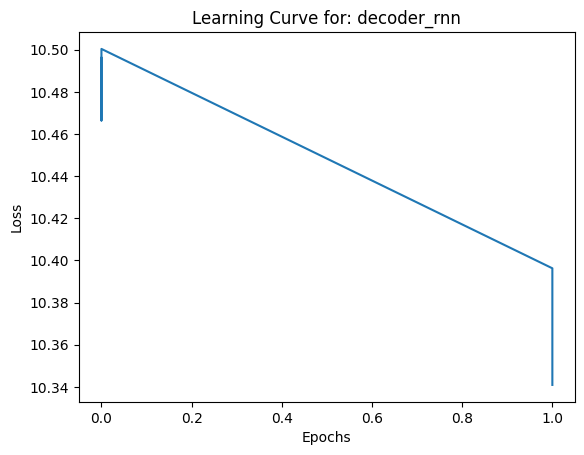

In [3]:
train(model=model, dataset=dataset)
test(model=model, dataset=dataset)

**Run inference**

Reconstructing vocabulary mapping from dataset...


Building Vocab: 100%|█████████████████████████| 77/77 [00:00<00:00, 7152.13it/s]


--- Generating Example Caption (Beam Search) ---
Image Path: /Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643/final_project/images/Impressionism/mary-cassatt_the-bath.jpg


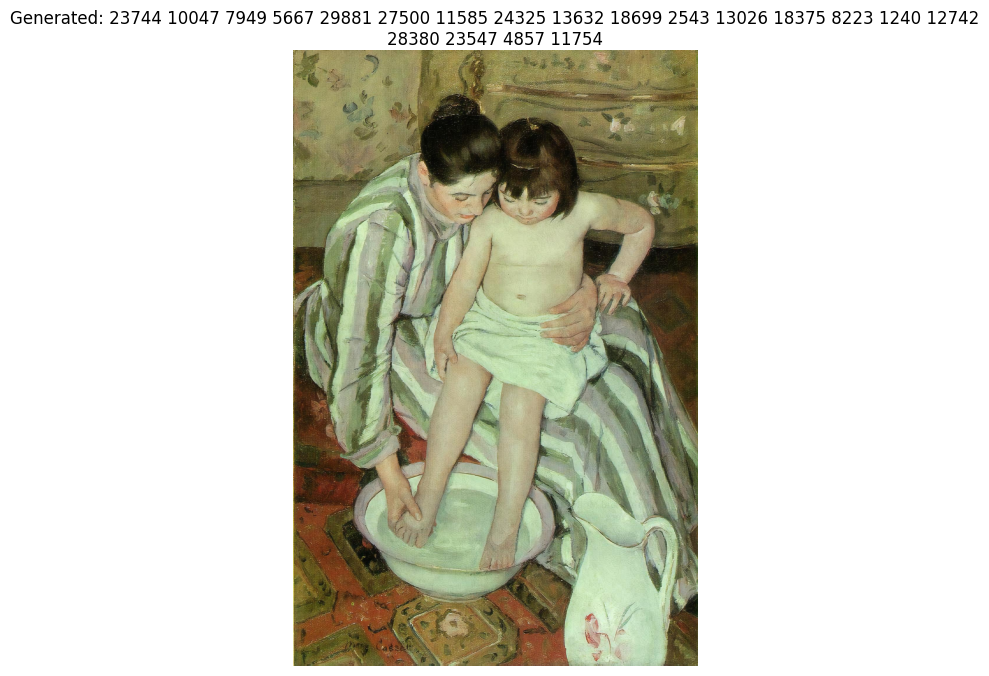

Generated Caption: 23744 10047 7949 5667 29881 27500 11585 24325 13632 18699 2543 13026 18375 8223 1240 12742 28380 23547 4857 11754

--- Generating Example Caption (Beam Search) ---
Image Path: /Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643/final_project/images/Baroque/bernardo-strozzi_old-coquette.jpg


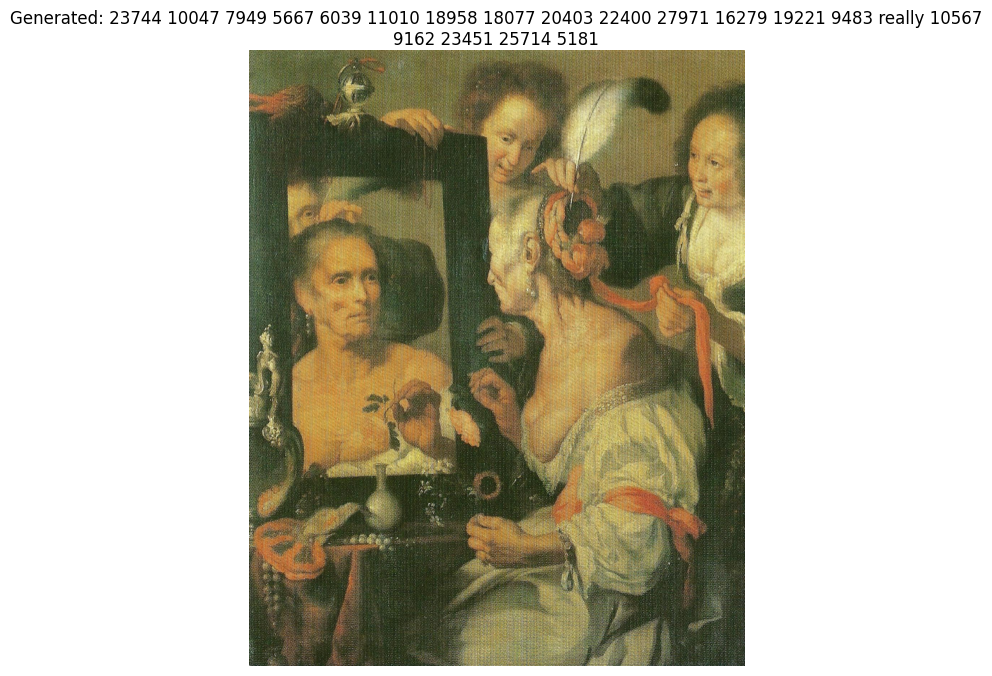

Generated Caption: 23744 10047 7949 5667 6039 11010 18958 18077 20403 22400 27971 16279 19221 9483 really 10567 9162 23451 25714 5181

--- Generating Example Caption (Beam Search) ---
Image Path: /Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643/final_project/images/Realism/homer-watson_horse-and-rider-in-a-landscape-1887.jpg


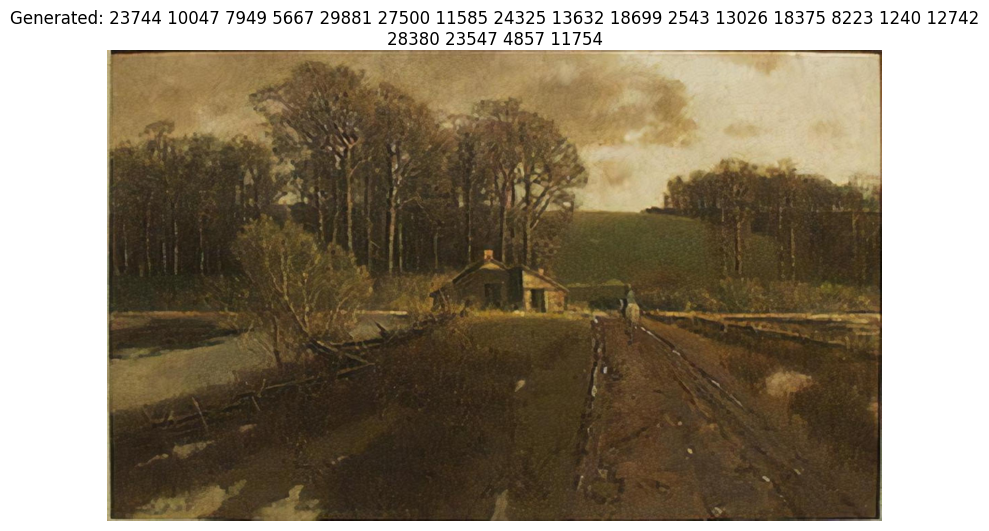

Generated Caption: 23744 10047 7949 5667 29881 27500 11585 24325 13632 18699 2543 13026 18375 8223 1240 12742 28380 23547 4857 11754

--- Generating Example Caption (Beam Search) ---
Image Path: /Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643/final_project/images/Color_Field_Painting/ronnie-landfield_village-in-the-moon-1985.jpg


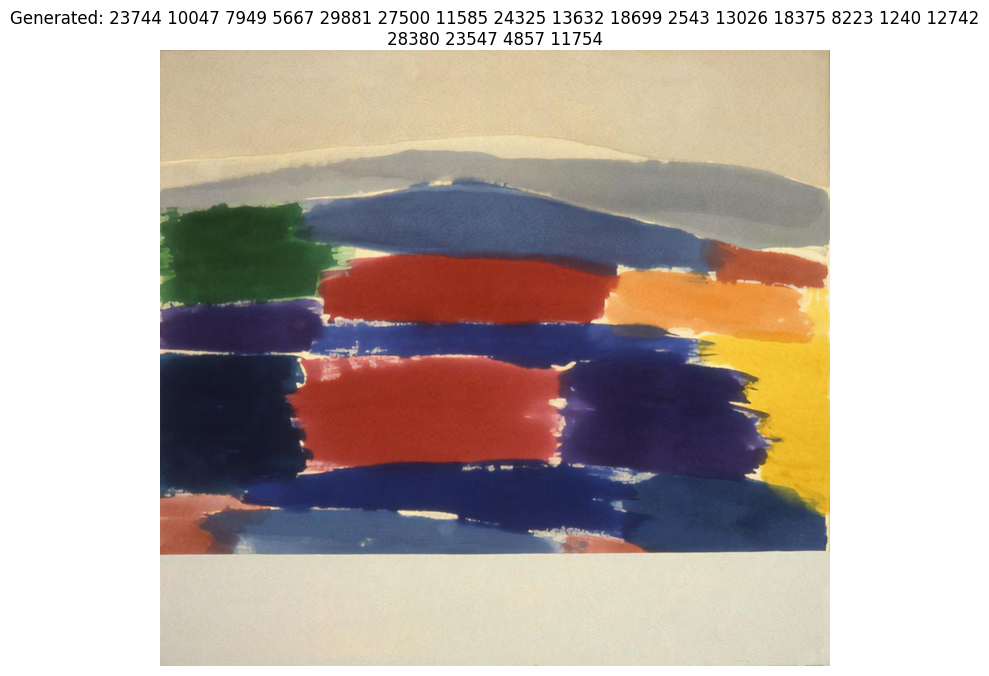

Generated Caption: 23744 10047 7949 5667 29881 27500 11585 24325 13632 18699 2543 13026 18375 8223 1240 12742 28380 23547 4857 11754

--- Generating Example Caption (Beam Search) ---
Image Path: /Users/alexis/Desktop/Desktop/OMSCS/Fall2025/CS7643/final_project/images/Abstract_Expressionism/jimmy-ernst_silent-protest-1976.jpg


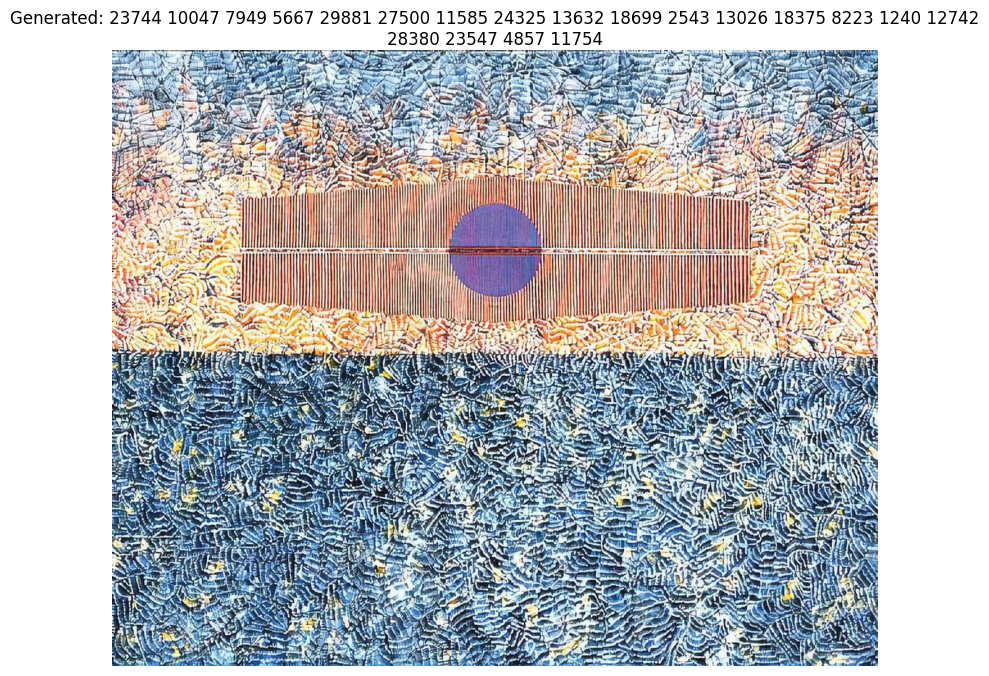

Generated Caption: 23744 10047 7949 5667 29881 27500 11585 24325 13632 18699 2543 13026 18375 8223 1240 12742 28380 23547 4857 11754


In [6]:
run_inference(model=model, dataset=dataset, use_pregen_vocab=True)